# EDA

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [197]:
df_steam = pd.read_excel('data/steam_data_final.xlsx')

In [198]:
# Create new columns for percentage of positive and negative reviews and the percentage of recomemendations
df_steam['Positive_Reviews_Percentage'] = df_steam['Positive_Reviews'] / (df_steam['Positive_Reviews'] + df_steam['Negative_Reviews']) * 100
df_steam['Negative_Reviews_Percentage'] = df_steam['Negative_Reviews'] / (df_steam['Positive_Reviews'] + df_steam['Negative_Reviews']) * 100
df_steam['Recommendation_Percentage'] = df_steam['Recommendations'] / (df_steam['Positive_Reviews'] + df_steam['Negative_Reviews']) * 100

In [199]:
df_steam.dtypes

Game                                   object
Steam_AppID                             int64
Minimum_age                             int64
Free                                    int64
About_the_Game                         object
Developers                             object
Publishers                             object
Windows_Support                         int64
Mac_Support                             int64
Linux_Support                           int64
Metacritic_Score                      float64
Recommendations                         int64
Release_Date                   datetime64[ns]
Count_DLC                               int64
Total_Achievements                      int64
Full_Controller_Support                 int64
DRM_Protection                          int64
Discounted_Price                      float64
Original_Price                        float64
categories_Description                 object
genres_Description                     object
Is_Subscription                   

In [200]:
df_steam.columns

Index(['Game', 'Steam_AppID', 'Minimum_age', 'Free', 'About_the_Game',
       'Developers', 'Publishers', 'Windows_Support', 'Mac_Support',
       'Linux_Support', 'Metacritic_Score', 'Recommendations', 'Release_Date',
       'Count_DLC', 'Total_Achievements', 'Full_Controller_Support',
       'DRM_Protection', 'Discounted_Price', 'Original_Price',
       'categories_Description', 'genres_Description', 'Is_Subscription',
       'Positive_Reviews', 'Negative_Reviews', 'Peak_Players_Yesterday',
       'Total_reviews', 'Peak_Players_all_Time', 'Positive_Reviews_Percentage',
       'Negative_Reviews_Percentage', 'Recommendation_Percentage'],
      dtype='object')

In [201]:
# While checking the Data in Excel notices there are some repeated IDs, remove the duplicates
df_steam = df_steam.drop_duplicates(subset='Steam_AppID', keep='first')

In [202]:
# Create a column with an estimated profit by multiplying the Peak Players of all time by the current price.
df_steam['Profit'] = df_steam['Peak_Players_all_Time'] * df_steam['Original_Price']

In [203]:
# Tota Games on this dataset
df_steam['Steam_AppID'].count()

11277

In [204]:
df_steam.describe()

,Steam_AppID,Minimum_age,Free,Windows_Support,Mac_Support,Linux_Support,Metacritic_Score,Recommendations,Count_DLC,Total_Achievements,...,Is_Subscription,Positive_Reviews,Negative_Reviews,Peak_Players_Yesterday,Total_reviews,Peak_Players_all_Time,Positive_Reviews_Percentage,Negative_Reviews_Percentage,Recommendation_Percentage,Profit
count,1.127700e+04,11277.000000,11277.000000,11277.000000,11277.000000,11277.000000,670.000000,1.127700e+04,11277.000000,11277.000000,...,11277.000000,1.127700e+04,11277.000000,1.127700e+04,1.127700e+04,8.585000e+03,9269.000000,9269.000000,9334.0,8.585000e+03
mean,1.178026e+06,0.297774,0.122550,0.999468,0.209098,0.145251,73.579104,1.949074e+03,0.739115,26.525672,...,0.001153,2.741848e+03,452.769886,2.994372e+02,3.194618e+03,2.006320e+03,73.849393,26.150607,inf,2.468290e+04
std,6.207313e+05,2.193869,0.327935,0.023061,0.406683,0.352370,10.568681,4.370199e+04,17.464560,223.684965,...,0.033935,6.833385e+04,12609.748869,1.321612e+04,7.869575e+04,4.500681e+04,24.031700,24.031700,NaN,6.448451e+05
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000e+00
25%,6.835300e+05,0.000000,0.000000,1.000000,0.000000,0.000000,68.000000,0.000000e+00,0.000000,0.000000,...,0.000000,1.000000e+00,0.000000,0.000000e+00,2.000000e+00,3.000000e+00,61.538462,7.500000,0.0,3.950000e+00
50%,1.090210e+06,0.000000,0.000000,1.000000,0.000000,0.000000,75.000000,0.000000e+00,0.000000,1.000000,...,0.000000,1.200000e+01,4.000000,0.000000e+00,1.700000e+01,7.000000e+00,80.000000,20.000000,0.0,2.394000e+01
75%,1.643470e+06,0.000000,0.000000,1.000000,0.000000,0.000000,81.000000,0.000000e+00,0.000000,20.000000,...,0.000000,8.000000e+01,24.000000,1.000000e+00,1.100000e+02,6.200000e+01,92.500000,38.461538,0.0,3.147900e+02
max,2.473690e+06,18.000000,1.000000,1.000000,1.000000,1.000000,96.000000,3.824966e+06,1555.000000,5000.000000,...,1.000000,6.465958e+06,934219.000000,1.255236e+06,7.287448e+06,3.260505e+06,100.000000,100.000000,inf,5.707515e+07


#### Start with correlation analysis

<AxesSubplot: >

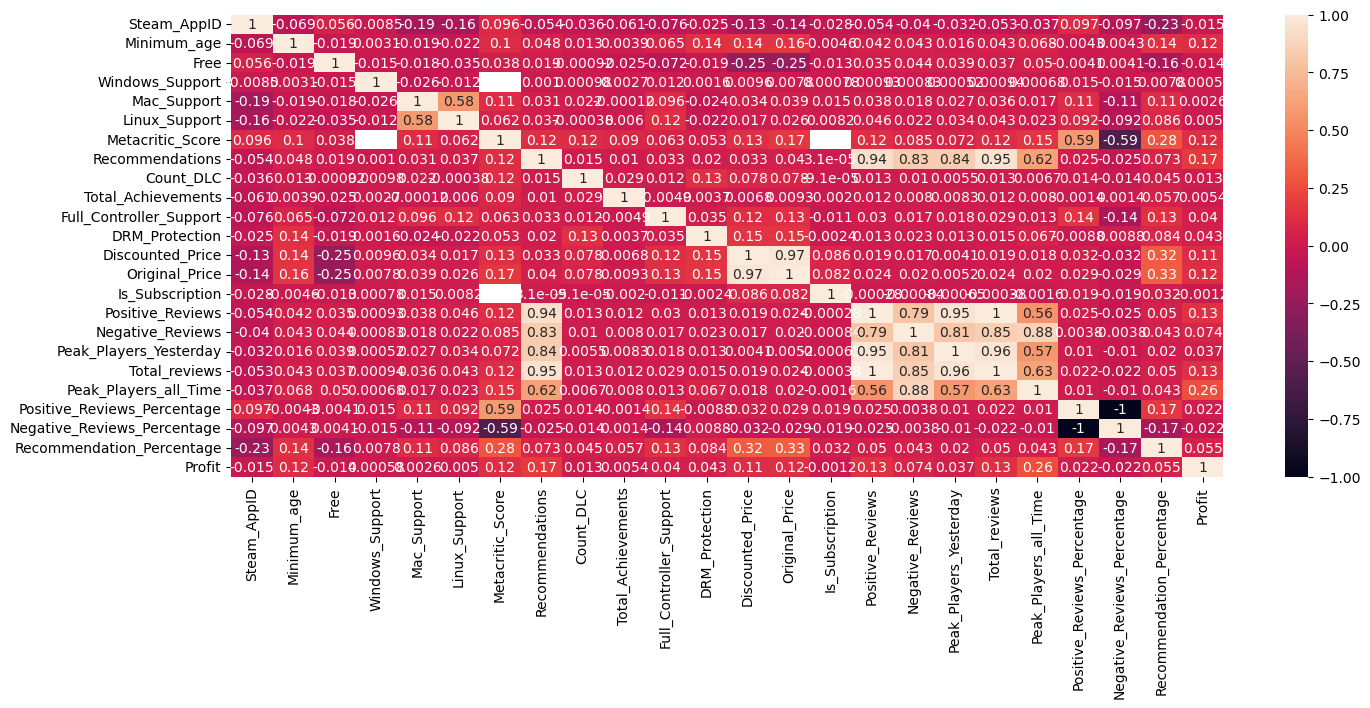

In [205]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
sns.heatmap(df_steam.corr(), vmin=-1, vmax=1, annot=True)

#### From the correlation map:
- Strong positive correlation between the Positive Reviews and the Recommendations
- Strong positive correlation between the Positive Reviews and the Peak Players Yesterday
- Games that support Mac also tend to support Linux and vice-versa. However this is NOT a rule
- Higher % of negative reviews tend to lower and the Metacritic score and vice-versa
- Positive reviews has a strong positive correlations with the Peak Players Yesterday
<br>
There's not any other correlations that can be usefull for this Project analysis

# Start by understanding what makes games make the Top 30.

In [206]:
game_profit_series = df_steam[['Game', 'Profit', 'Original_Price', 'categories_Description', 'genres_Description']]
# Sort the data series in descending order by 'Profit'
sorted_data = game_profit_series.sort_values('Profit', ascending=False)
# Apply "." for easier readability
sorted_data['Profit'] = sorted_data['Profit'].apply(lambda x: '{:,.0f}'.format(x).replace(',', '.'))

# Print the top 30 games with additional columns
top_30_games = sorted_data.head(30)
top_30_games[['Game', 'Profit', 'Original_Price', 'categories_Description', 'genres_Description']]


,Game,Profit,Original_Price,categories_Description,genres_Description
6337,ELDEN RING,57.075.146,59.99,"Single-player, Multi-player, PvP, Online PvP, ...","Action, RPG"
1016,DARK SOULS™ III,7.789.402,59.99,"Single-player, Multi-player, Co-op, Steam Achi...",Action
8001,Forza Horizon 5,4.855.441,59.98,"Single-player, Multi-player, PvP, Online PvP, ...","Action, Adventure, Racing, Simulation, Sports"
9370,EA SPORTS™ FIFA 23,4.354.401,57.73,"Single-player, Multi-player, PvP, Online PvP, ...","Simulation, Sports"
528,Sid Meier’s Civilization® VI,4.207.419,25.87,"Single-player, Multi-player, PvP, Online PvP, ...",Strategy
892,Tom Clancy's Rainbow Six® Siege,3.990.605,19.97,"Single-player, Multi-player, PvP, Online PvP, ...",Action
1106,Call of Duty®: Black Ops III,3.743.796,59.99,"Single-player, Multi-player, Co-op, Shared/Spl...","Action, Adventure"
177,Borderlands 2,3.742.842,29.99,"Single-player, Multi-player, Co-op, Steam Achi...","Action, RPG"
529,The Witcher 3: Wild Hunt,3.542.546,34.25,"Single-player, Steam Achievements, Full contro...",RPG
281,Company of Heroes 2,3.295.411,19.99,"Single-player, Multi-player, PvP, Online PvP, ...",Strategy


#### Well, that's a lot of money but are key things to take into account:
- This is based on the number of peak players of all time, it does not reflect how many people actually bought the game.
- It's ONLY data from Steam.
- It does not take into account extra money from paid DLCs.

#### The actual profit can be way way higher

In [207]:
game_Metacritic_Score_series = df_steam[['Game', 'Metacritic_Score', 'Original_Price', 'categories_Description', 'genres_Description']]
sorted_Metacritic_Scoredata = game_Metacritic_Score_series.sort_values('Metacritic_Score', ascending=False)

# Print the top 30 games with additional columns
top_30_games = sorted_Metacritic_Scoredata.head(30)
top_30_games


,Game,Metacritic_Score,Original_Price,categories_Description,genres_Description
6,Half-Life,96.0,8.19,"Single-player, Multi-player, PvP, Online PvP, ...",Action
9,Half-Life 2,96.0,9.75,"Single-player, Steam Achievements, Steam Tradi...",Action
23,Portal 2,95.0,9.75,"Single-player, Multi-player, Co-op, Online Co-...","Action, Adventure"
6337,ELDEN RING,94.0,59.99,"Single-player, Multi-player, PvP, Online PvP, ...","Action, RPG"
979,Divinity: Original Sin - Enhanced Edition,94.0,39.99,"Single-player, Multi-player, Co-op, Shared/Spl...","Adventure, Indie, RPG, Strategy"
529,The Witcher 3: Wild Hunt,93.0,34.25,"Single-player, Steam Achievements, Full contro...",RPG
19,Team Fortress 2,92.0,0.00,"Multi-player, Cross-Platform Multiplayer, Stea...",Action
1235,Spelunky 2,91.0,16.79,"Single-player, Multi-player, PvP, Online PvP, ...","Action, Indie"
6204,Chained Echoes,91.0,24.99,"Single-player, Steam Achievements, Full contro...","Indie, RPG"
157,Dragon Age: Origins - Ultimate Edition,91.0,29.99,Single-player,RPG


In [208]:
# Get Games by Recommendations
game_Recommendations_series = df_steam[['Game', 'Recommendations']]
sorted_Recommendations = game_Recommendations_series.sort_values('Recommendations', ascending=False)

# Top 30
sorted_Recommendations.head(30)

,Game,Recommendations
25,Counter-Strike: Global Offensive,3824966
2161,PUBG: BATTLEGROUNDS,1658932
892,Tom Clancy's Rainbow Six® Siege,964621
27,Garry's Mod,824881
529,The Witcher 3: Wild Hunt,666158
21,Left 4 Dead 2,546289
6337,ELDEN RING,508009
835,ARK: Survival Evolved,482770
5671,Fall Guys,418101
302,The Forest,408909


#### Now that we have an idea of what are the Top 30 games, let's check the data for them:
- Categories
- Genre
- Supported OS
- Controller Support
- Price
- DRM

In [209]:
# Convert the releasedd data to date
df_steam['Release_Date'] = pd.to_datetime(df_steam['Release_Date'])

### Let's see what are the titles repeating on the top and bottom 20

In [210]:
# See what are the Top 20 games
top10_metacritic_score = df_steam['Metacritic_Score'].nlargest(20).index
top10_recommendations = df_steam['Recommendations'].nlargest(20).index
top10_positive_reviews = df_steam['Positive_Reviews'].nlargest(20).index
top10_peak_players_yesterday = df_steam['Peak_Players_Yesterday'].nlargest(20).index

# Combine the indices from all four variables into a single DataFrame
top10_games = pd.DataFrame({
    'Metacritic_Score': top10_metacritic_score,
    'Recommendations': top10_recommendations,
    'Positive_Reviews': top10_positive_reviews,
    'Peak_Players_Yesterday': top10_peak_players_yesterday
})

# Find the unique games from the combined top 20 lists
unique_games = top10_games.drop_duplicates()
unique_games

,Metacritic_Score,Recommendations,Positive_Reviews,Peak_Players_Yesterday
0,6,25,25,25
1,9,2161,22,22
2,23,892,2161,2161
3,979,27,892,9628
4,6337,529,27,19
5,529,21,19,9370
6,19,6337,21,606
7,157,835,529,835
8,434,5671,6337,892
9,1235,302,835,677


In [211]:
# See what are the bottom 20 games
bottom10_metacritic_score = df_steam['Metacritic_Score'].nsmallest(20).index
bottom10_recommendations = df_steam['Recommendations'].nsmallest(20).index
bottom10_positive_reviews = df_steam['Positive_Reviews'].nsmallest(20).index
bottom10_peak_players_yesterday = df_steam['Peak_Players_Yesterday'].nsmallest(20).index

# Combine the indices from all four variables into a single DataFrame
bottom10_games = pd.DataFrame({
    'Metacritic_Score': bottom10_metacritic_score,
    'Recommendations': bottom10_recommendations,
    'Positive_Reviews': bottom10_positive_reviews,
    'Peak_Players_Yesterday': bottom10_peak_players_yesterday
})

# Find the unique games from the combined bottom 20 lists
unique_games_bottom = bottom10_games.drop_duplicates()

unique_games_bottom

,Metacritic_Score,Recommendations,Positive_Reviews,Peak_Players_Yesterday
0,3312,31,64,36
1,124,38,358,37
2,2921,50,359,38
3,140,59,511,42
4,294,62,828,50
5,88,64,864,58
6,66,66,969,64
7,399,68,1034,66
8,834,69,1069,67
9,5457,76,1070,68


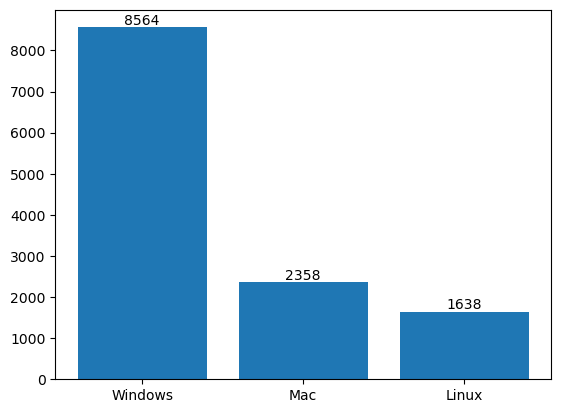

In [212]:
# Count the number of games that only support Windows
only_windows_count = ((df_steam['Windows_Support'] == 1) & (df_steam['Mac_Support'] == 0) & (df_steam['Linux_Support'] == 0)).sum()

# Count the number of games that support Mac
mac_count = (df_steam['Mac_Support'] == 1).sum()

# Count the number of games that support Linux
linux_count = (df_steam['Linux_Support'] == 1).sum()

# Create the bar chart
os_system = ['Windows', 'Mac', 'Linux']
counts = [only_windows_count, mac_count, linux_count]
plt.bar(os_system, counts)

# Add value labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count),ha='center', va='bottom')

plt.show()

#### There's a huge difference between the number of games that only support Windows and the other OS's, but we need to see if the games in Mac and Linux are gaining or losing popularity.

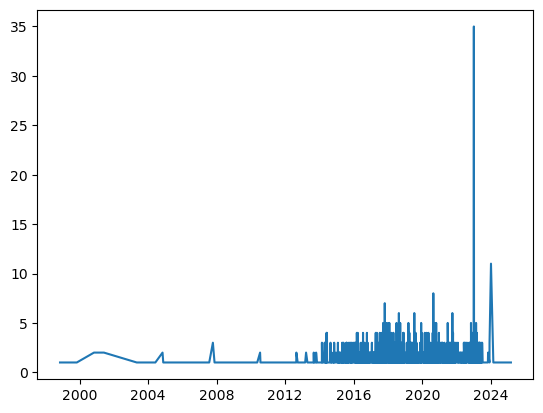

In [213]:
# Filter the DataFrame for games that support Mac
mac_games = df_steam[df_steam['Mac_Support'] == 1]

# Group by release date and count the number of games released on each date
mac_games_per_date = mac_games.groupby('Release_Date').size()

plt.plot(mac_games_per_date.index, mac_games_per_date.values)
plt.show()

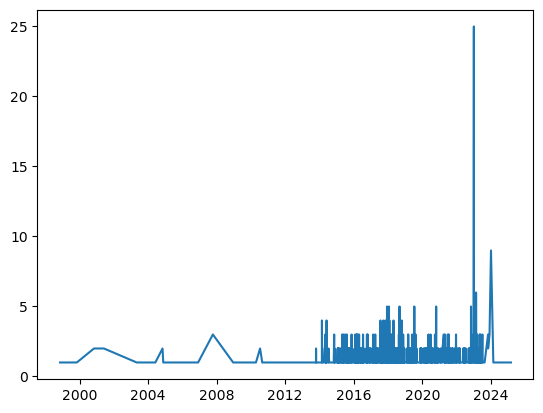

In [214]:
# Filter the DataFrame for games that support Linux
linux_games = df_steam[df_steam['Linux_Support'] == 1]

# Group by release date and count the number of games released on each date
linux_games_per_date = linux_games.groupby('Release_Date').size()

plt.plot(linux_games_per_date.index, linux_games_per_date.values)
plt.show()

#### There's been a slight increase in game releases on both platforms for the past ~10 years.<br> Our devoloper can potentially get some gamers if this OS's are supported

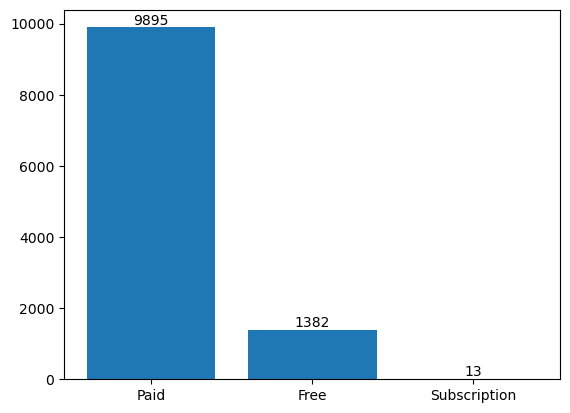

In [215]:
# Count the number of games that are paid, number of free games and the count of subscription games
free_games = (df_steam['Free'] == 1).sum()

paid_games = (df_steam['Free'] == 0).sum()

subscription_games = (df_steam['Is_Subscription'] == 1).sum()

# Create the bar chart
price = ['Paid', 'Free', 'Subscription']
counts = [paid_games,free_games, subscription_games]
plt.bar(price, counts)

# Add value labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count),ha='center', va='bottom')

plt.show()

#### Only approximately 14% of the games on Steam are free and not even 0.15% are a subscription based

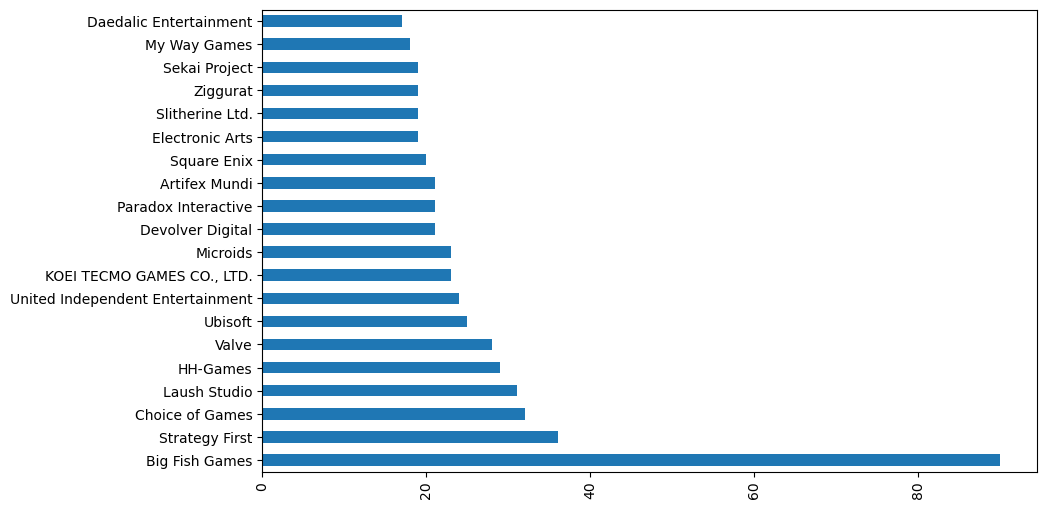

In [216]:
# Count the number of games published by the top 20 publishers
publisher_counts = df_steam['Publishers'].value_counts().head(20)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
publisher_counts.plot(kind='barh', ax=ax)

# Make the labels horizontal
plt.xticks(rotation=90)

plt.show()

#### Big Fish Games is the major publisher on steam, upon further investigation, they produce their own games and do not publish for other Devs as it is with the majority of the top Publishers

#### Check what are the months with more games released

In [217]:
# Group dates by month
df_steam['Month'] = df_steam['Release_Date'].dt.month
monthly_counts = df_steam.groupby('Month').size()

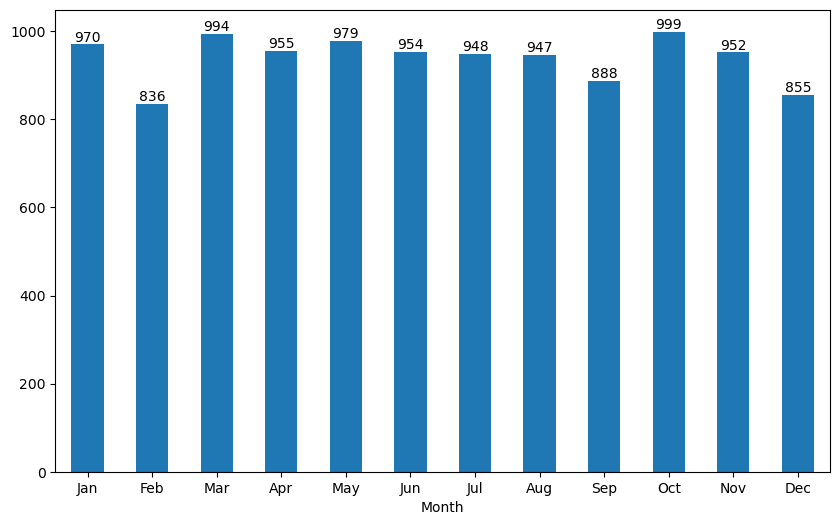

In [218]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
monthly_counts.plot(kind='bar', ax=ax)
# Update the x-axis tick labels
month_labels = [calendar.month_abbr[i] for i in range(1, 13)]  # Get month abbreviations
ax.set_xticklabels(month_labels, rotation=0)  # Rotate x-axis labels by 45 degrees

# Add value labels to the bars
for i, count in enumerate(monthly_counts):
    plt.text(i, count, str(count),ha='center', va='bottom')

plt.show()

#### During February and December, it seems there are fewer games being released, so this can be an opportunity for our developer.

### Now, we will get an overview on the genres of games we have

In [219]:
# Sliple each value separeted by ","
df_steam['Genres'] = df_steam['genres_Description'].str.split(', ')
# Get a row for each value separeted by ","
df_genres = df_steam.explode('Genres')
# Count the occurrences
genre_counts = df_genres['Genres'].value_counts()

# Get the count for each genre
for genre, count in genre_counts.items():
    print(genre, count)

Indie 7681
Action 4704
Casual 4394
Adventure 4370
Simulation 2215
Strategy 2170
RPG 1928
Early Access 1199
Sports 531
Racing 414
Massively Multiplayer 296
Utilities 95
Violent 81
Design & Illustration 71
Education 60
Animation & Modeling 53
Gore 49
Software Training 35
Video Production 34
Game Development 29
Audio Production 23
Photo Editing 18
Nudity 16
Web Publishing 12
Accounting 7
Sexual Content 6
Movie 1
Documentary 1
Episodic 1
Short 1
Tutorial 1
360 Video 1


#### Indies are extremely popular but they are not a genre per se. So let's see what games have other genres that include indie in the genre row

In [220]:
games_with_indie = df_steam[df_steam['genres_Description'].str.contains('Indie', case=False, na=False)]['genres_Description'].value_counts()

for description, count in games_with_indie.items():
    print(description, count)

Action, Indie 669
Casual, Indie 622
Action, Adventure, Indie 564
Adventure, Indie 471
Adventure, Casual, Indie 370
Action, Casual, Indie 369
Indie 340
Action, Adventure, Casual, Indie 213
Casual, Indie, Strategy 210
Adventure, Indie, RPG 170
Action, Adventure, Indie, RPG 167
Casual, Indie, Simulation 152
Indie, Strategy 126
Action, Indie, Early Access 106
Indie, RPG 98
Indie, Simulation, Strategy 95
Indie, Simulation 91
Adventure, Casual, Indie, RPG 78
Action, Indie, RPG 77
Action, Indie, Strategy 74
Casual, Indie, Simulation, Strategy 62
Action, Adventure, Indie, Early Access 61
Action, Casual, Indie, Strategy 60
Adventure, Casual, Indie, Simulation 59
Action, Adventure, Casual, Indie, Simulation 53
Indie, RPG, Strategy 53
Action, Adventure, Indie, Simulation 53
Adventure, Indie, Simulation 53
Action, Adventure, Casual, Indie, RPG 48
Action, Indie, Simulation 44
Action, Casual, Indie, Simulation 44
Action, Adventure, Indie, Strategy 44
Casual, Indie, RPG 42
Adventure, Casual, Indie, S